![image](./images/pandas.png)

Pandas est le package de prédilection pour traiter des données structurées.

Pandas est basé sur 2 structures extrêmement liées les Series et le DataFrame.

Ces deux structures permettent de traiter des données sous forme de tableaux indexés.

Les classes de Pandas utilisent des classes de Numpy, il est donc possible d'utiliser les fonctions universelles de Numpy sur les objets Pandas.

In [1]:
# on importe pandas avec :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Les Series de Pandas

- Les Series sont indexées, c'est leur avantage sur les arrays de NumPy
- On peut utiliser les fonctions `.values` et `.index` pour voir les différentes parties de chaque Series
- On définit une Series par `pd.Series([,], index=['','',])`
- On peut appeler un élément avec `ma_serie['France']`
- On peut aussi faire des conditions :
```python
ma_serie[ma_serie>5000000]
```
```
'France' in ma_serie
```
- Les objets Series peuvent être transformés en dictionnaires en utilisant :
`.to_dict()`

**Exercice :**
    
Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.


In [2]:
ser_pop = pd.Series([70,8,300,1200],index=["France","Suisse","USA","Chine"])

In [3]:
ser_pop

France      70
Suisse       8
USA        300
Chine     1200
dtype: int64

In [4]:
# extraire un individu
ser_pop["France"]

70

In [5]:
# extraire un individu par position
ser_pop.iloc[0]

70

In [6]:
# extraire les pays avec moins de 50M
ser_pop[ser_pop<50]

Suisse    8
dtype: int64

# D'autres opérations sur les objets series

- Pour définir le nom de la Series, on utilise `.name`
- Pour définir le titre de la colonne des observations, on utilise `.index.name`

**Exercice :**
    
Définir les noms de l’objet et de la colonne des pays pour la Series précédente


In [7]:
ser_pop.name = "Populations"
ser_pop.index.name = "Pays"
ser_pop

Pays
France      70
Suisse       8
USA        300
Chine     1200
Name: Populations, dtype: int64

# Les données manquantes

Dans pandas, les données manquantes sont identifiés avec les fonctions de Numpy (`np.nan`). On a d'autres fonctions telles que :

In [8]:
pd.isna(pd.Series([2,np.nan,4],index=['a','b','c']))

a    False
b     True
c    False
dtype: bool

In [9]:
pd.notna(pd.Series([2,np.nan,4],index=['a','b','c']))

a     True
b    False
c     True
dtype: bool

# Les dates avec pandas

- Python possède un module datetime qui permet de gérer facilement des dates
- Pandas permet d'appliquer les opérations sur les dates aux Series et aux DataFrame
- Le format es dates Python est `YYYY-MM-DD HH:MM:SS`

- On peut générer des dates avec la fonction `pd.date_range()` avec différente fréquences `freq=`
- On peut utiliser ces dates comme index dans un DataFrame ou dans un objet Series
- On peut changer la fréquence en utilisant `.asfreq()`
- Pour transformer une chaine de caractère en date, on utilise `pd.to_datetime()` avec l’option `dayfirst=True` si on est dans le cas français
-On pourra aussi spécifier un format pour accélérer le processus `%Y%m%d`

**Exercice :**

Créez un objet Series et ajoutez des dates partant du 3 octobre 2017 par jour jusqu’à aujourd’hui. Afficher le résultat dans un graphique (on utilisera la méthode `.plot()`

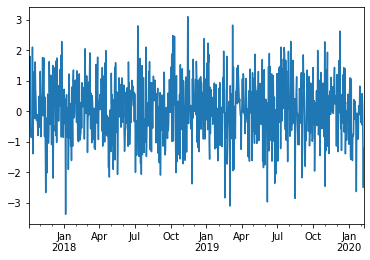

In [10]:
import datetime
dates = pd.date_range(start="2017-10-03",end=datetime.date.today(),freq="d")
ser_date = pd.Series(np.random.randn(len(dates)),index=dates)
ser_date.plot()
plt.savefig("mon_graphique.jpg")

# Le DataFrame 

- Les DataFrame sont des objets très souples pouvant être construits de différentes façon
- On peut les construire en récupérant des données copier / coller, où directement sur Internet, ou en entrant les valeurs manuellement


- Les DataFrame se rapprochent des dictionnaires et on peut construire ces objets en utilisant `DataFrame(dico)`
- De nombreux détails sur la création des DataFrame se trouve sur ce site :

<http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html>


# Construction de DataFrame

On peut simplement construire un DataFrame avec le classe pd.DataFrame() à partir de différentes structures :

In [11]:
frame1=pd.DataFrame(np.random.randn(10).reshape(5,2),
             index=["obs_"+str(i) for i in range(5)],
             columns=["col_"+str(i) for i in range(2)])
frame1

,col_0,col_1
obs_0,1.750275,-2.580394
obs_1,0.385944,1.677378
obs_2,0.811410,0.161821
obs_3,1.036269,-0.091300
obs_4,0.571832,-1.281828


# Opérations sur les DataFrame

On peut afficher le nom des colonnes :

In [12]:
print(frame1.columns)

Index(['col_0', 'col_1'], dtype='object')


On peut accéder à une colonne avec :
- `frame1.col_0` : attention au cas de nom de colonnes avec des espaces...
- `frame1['col_0']`

On peut accéder à une cellule avec :
- `frame1.loc['obs1','col_0']` : on utilise les index et le nom des colonnes
- `frame1.iloc[1,0]` : on utilise les positions dans le DataFrame


# Options de visualisation et de résumé

Pour afficher les 3 premières lignes, on peut utiliser :


In [13]:
frame1.head(3)

,col_0,col_1
obs_0,1.750275,-2.580394
obs_1,0.385944,1.677378
obs_2,0.811410,0.161821


Pour afficher un résumé du DF :

In [14]:
frame1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, obs_0 to obs_4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_0   5 non-null      float64
 1   col_1   5 non-null      float64
dtypes: float64(2)
memory usage: 120.0+ bytes


# Importer des données externes

Pandas est l'outil le plus efficace pour importer des données externes, il prend en charge de nombreux formats dont csv, Excel, SQL, SAS...


## Importation de données avec Pandas

Quel que soit le type de fichier, Pandas possède une fonction :
```python
frame=pd.read_...('chemin_du_fichier/nom_du_fichier',...)
```
Pour écrire un DataFrame dans un fichier, on utilise :
```python
frame.to_...('chemin_du_fichier/nom_du_fichier',...)
```

**Exercice :**
    
Importer un fichier `.csv` avec `pd.read_csv()`. On utilisera le fichier "./data/airbnb.csv"

In [15]:
airbnb = pd.read_csv("./data/airbnb.csv")

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20190507030954,2019-05-07,zen and calm,Appartement très calme de 50M2 Utilisation de ...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14 Good restaura...,none,Good restaurants very close the Montparnasse S...,...,f,f,flexible,f,f,1,1,0,0,0.28
1,5396,https://www.airbnb.com/rooms/5396,20190507030954,2019-05-08,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","Small, well appointed studio apartment at the ...","Cozy, well-appointed and graciously designed s...",none,"You are within walking distance to the Louvre,...",...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,1.44
2,7397,https://www.airbnb.com/rooms/7397,20190507030954,2019-05-07,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...,"VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...",none,NaN,...,f,f,moderate,f,f,1,1,0,0,2.47
3,8522,https://www.airbnb.com/rooms/8522,20190507030954,2019-05-08,GREAT FLAT w/ CITY VIEW,NaN,Really nice flat located in the 20th district ...,Really nice flat located in the 20th district ...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,0.01
4,9359,https://www.airbnb.com/rooms/9359,20190507030954,2019-05-07,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,"Since I live in the USA, it is difficult to ma...",Location! Location! Location! Just bring your ...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,NaN


In [17]:
airbnb.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59126 entries, 0 to 59125
Data columns (total 106 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   id                                            int64  
 1   listing_url                                   object 
 2   scrape_id                                     int64  
 3   last_scraped                                  object 
 4   name                                          object 
 5   summary                                       object 
 6   space                                         object 
 7   description                                   object 
 8   experiences_offered                           object 
 9   neighborhood_overview                         object 
 10  notes                                         object 
 11  transit                                       object 
 12  access                                        object 
 13  

In [18]:
# extraire une colonne
airbnb["price"]

0         $75.00
1        $115.00
2        $115.00
3         $90.00
4         $75.00
          ...   
59121     $50.00
59122    $350.00
59123     $80.00
59124     $32.00
59125     $60.00
Name: price, Length: 59126, dtype: object

# D'autres types de données

## JSON
Les objets JSON ressemblent à des dictionnaires.

On utilise le module `json` puis la fonction `json.loads()` pour transformer une entrée JSON en objet json

## HTML
On utilise `pd.read_html(url)`. Cet fonction est basée sur les packages `beautifulsoup` et `html5lib`

Cette fonction renvoie une liste de DataFrame qui représentent tous les DataFrame de la page. On ira ensuite chercher l'élément qui nous intéresse avec `frame_list[0]`

**Exercice :**
    
Importez un tableau en html depuis la page <http://www.fdic.gov/bank/individual/failed/banklist.html>

In [19]:
bank = pd.read_html("http://www.fdic.gov/bank/individual/failed/banklist.html")

In [20]:
bank[0]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
1,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019"
2,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019"
3,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.","May 31, 2019"
4,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017"
...,...,...,...,...,...,...
554,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001"
555,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001"
556,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001"
557,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000"


# Importer depuis Excel

On a deux approches pour Excel :
- On peut utiliser `pd.read_excel()`
- On peut utiliser la classe `pd.ExcelFile()`

Dans ce cas, on utilise :
```python
xlsfile=pd.ExcelFile('fichier.xlsx')
xlsfile.parse('Sheet1')
```

**Exercice :** 
    
Importez un fichier Excel avec les deux approches, on utilisera : `credit2.xlsx` et `ville.xls`

In [21]:
credit2 = pd.read_excel("./data/credit2.xlsx")

In [22]:
credit2.head()

,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner,Customer_ID
0,40,F,S,11,6,37,56,37073,F,5409
1,47,M,M,13,13,30,56,50721,F,5477
2,35,F,U,1,9,33,57,43578,T,5507
3,45,M,U,15,7,30,62,69553,F,8
4,13,F,S,0,7,27,64,37502,T,158


In [23]:
ville_excel = pd.ExcelFile("./data/ville.xls")

In [24]:
nom_feuille = ville_excel.sheet_names[0]

In [25]:
nom_feuille

'ville'

In [26]:
frame_ville = ville_excel.parse(nom_feuille)

In [27]:
frame_ville.columns

Index(['NomVille', 'MAJ   ', ' Code Postal ', ' Code INSEE ', 'Code Région',
       ' Latitude ', ' Longitude ', ' Eloignement '],
      dtype='object')

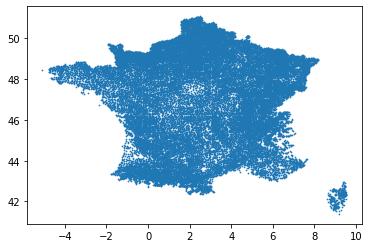

In [28]:
import matplotlib.pyplot as plt

plt.scatter(" Longitude "," Latitude ",data=frame_ville, s=0.5)

# Importer des données SQL

Pandas possède une fonction `read_sql()` qui permet d’importer directement des bases de données ou des queries dans des DataFrame

Il faut tout de même un connecteur pour accéder aux bases de données

Pour mettre en place ce connecteur, on utlise le package SQLAlchemy.

Suivant le type de base de données, on utilisera différents codes mais la structure du code est toujours la même

In [29]:
# on importe l'outil de connexion
from sqlalchemy import create_engine

On crée une connexion
```python
connexion=create_engine("sqlite:///(...).sqlite")
```

On utlise une des fonctions de Pandas pour charger les données
```python
requete="""select ... from ..."""
frame_sql=pd.read_sql_query(requete,connexion)
```

**Exercices :**
    
Importez la base de données SQLite salaries et récupérez la table Salaries dans un DataFrame 

In [30]:
connexion=create_engine("sqlite:///./data/Salaries.sqlite")

requete="""select * from salaries"""
frame_sql=pd.read_sql_query(requete,connexion)

In [31]:
frame_sql.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


# Importer des données SAS

On peut utiliser `pd.read_sas`

**Exercice :**
Importez le fichier SAS se trouvant dans le répertoire `./data/`

In [32]:
frame_sas = pd.read_sas("./data/bce_uai.sas7bdat",encoding='ISO-8859-1')

In [33]:
frame_sas["PATRONYME_UAI"].value_counts()

JULES FERRY        499
JACQUES PREVERT    370
JEAN MOULIN        362
SAINT JOSEPH       350
JEAN JAURES        319
                  ... 
DES VANNELLES        1
EDOUARD CAZAUX       1
LACORDAIRE J         1
TARTENSON            1
VAL MORE             1
Name: PATRONYME_UAI, Length: 27874, dtype: int64

In [34]:
frame_sas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67441 entries, 0 to 67440
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   CONTRAT_ETABLISSEMENT        67441 non-null  object        
 1   CATEGORIE_JURIDIQUE          67441 non-null  object        
 2   ETAT_ETABLISSEMENT           67441 non-null  object        
 3   MINISTERE_TUTELLE            67441 non-null  object        
 4   NUMERO_UAI                   67441 non-null  object        
 5   SIGLE_UAI                    67426 non-null  object        
 6   SECTEUR_PUBLIC_PRIVE         67441 non-null  object        
 7   NATURE_UAI                   67441 non-null  object        
 8   COMMUNE                      67441 non-null  object        
 9   DATE_OUVERTURE               67441 non-null  datetime64[ns]
 10  DATE_FERMETURE               94 non-null     datetime64[ns]
 11  DENOMINATION_PRINCIPALE_UAI  67437 non-nu

In [35]:
frame_sas.columns

Index(['CONTRAT_ETABLISSEMENT', 'CATEGORIE_JURIDIQUE', 'ETAT_ETABLISSEMENT',
       'MINISTERE_TUTELLE', 'NUMERO_UAI', 'SIGLE_UAI', 'SECTEUR_PUBLIC_PRIVE',
       'NATURE_UAI', 'COMMUNE', 'DATE_OUVERTURE', 'DATE_FERMETURE',
       'DENOMINATION_PRINCIPALE_UAI', 'PATRONYME_UAI', 'NIVEAU_UAI',
       'SECTEUR_CONTRAT'],
      dtype='object')

# Les tris avec Pandas 

Pour effectuer des tris, on utilise :
- `.sort_index()` pour le tri des index
- `.sort_values()` pour le tri des données
- `.rank()` affiche le rang des observations

Il peut y avoir plusieurs tris dans la même opération. Dans ce cas, on utilise des listes de colonnes :
```python
frame.sort_values(["col_1","col_2"])
```

**Exercice :** 
Trier les logements airbnb par prix

In [36]:
# convertir la colonne price en numérique
# enlever le $
airbnb["price_num"] = pd.to_numeric(airbnb["price"].str[1:].str.replace(",",""))
#pd.to_numeric()


In [37]:
airbnb.sort_values("price_num",ascending=True)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num
33559,19974916,https://www.airbnb.com/rooms/19974916,20190507030954,2019-05-07,Petit nid - village de Montmartre,À deux pas de la Basilique du Sacré Cœur. Dans...,À deux pas du Sacré Cœur dans une charmante ru...,À deux pas de la Basilique du Sacré Cœur. Dans...,none,Montmartre!,...,f,strict_14_with_grace_period,f,f,1,1,0,0,2.58,0.0
34341,20291987,https://www.airbnb.com/rooms/20291987,20190507030954,2019-05-08,Romantic Garden view near Champs-Elysées,"Very private, on an inner romantic garden, rem...",The studio offers a well-equipped space and is...,"Very private, on an inner romantic garden, rem...",none,"Quiet neighborhood, small supermarket across t...",...,f,strict_14_with_grace_period,f,f,5,5,0,0,1.42,0.0
46598,27546389,https://www.airbnb.com/rooms/27546389,20190507030954,2019-05-07,Appartement familiale dans le 12ème,NaN,Appartement familiale comprenant trois chambre...,Appartement familiale comprenant trois chambre...,none,NaN,...,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN,0.0
34370,20313940,https://www.airbnb.com/rooms/20313940,20190507030954,2019-05-07,Charming loft in the Upper Marais,Charming artist's loft on the top floor of an ...,The apartment is a single open space with cath...,Charming artist's loft on the top floor of an ...,none,"The Upper Marais, where the apartment is locat...",...,f,moderate,f,f,1,1,0,0,1.29,0.0
34191,20219162,https://www.airbnb.com/rooms/20219162,20190507030954,2019-05-07,Nice & cosy parisian flat,Hello :) Welcome to the best area of Paris ! T...,NaN,Hello :) Welcome to the best area of Paris ! T...,none,NaN,...,f,moderate,f,f,1,1,0,0,0.12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10073,6088687,https://www.airbnb.com/rooms/6088687,20190507030954,2019-05-07,Lovely Duplex 30m2 - Le Marais,The apartment is a charming studio organized i...,Hello! I entrust to you my charming duplex apa...,The apartment is a charming studio organized i...,none,"Great neighbourhood, very central in the 3rd d...",...,f,strict_14_with_grace_period,f,f,1,1,0,0,0.78,8500.0
42726,25448670,https://www.airbnb.com/rooms/25448670,20190507030954,2019-05-08,cosytiti Paris 15,cosytiti,cosytiti,cosytiti cosytiti facile,none,NaN,...,f,flexible,f,f,1,1,0,0,0.18,8576.0
14823,8093890,https://www.airbnb.com/rooms/8093890,20190507030954,2019-05-08,EIFFEL TOWER TROCADERO 2 BEDROOM,Wonderful parisian flat close (3 min walk) to ...,"The room is situated in a very nice Parisian ""...",Wonderful parisian flat close (3 min walk) to ...,none,"Close to Trocadero, arc de Triomphe, the area ...",...,f,strict_14_with_grace_period,f,f,1,1,0,0,0.21,8721.0
46718,27608896,https://www.airbnb.com/rooms/27608896,20190507030954,2019-05-07,Petit studio parisien,Petit studio tranquille dans le 14e Reposant e...,NaN,Petit studio tranquille dans le 14e Reposant e...,none,NaN,...,f,flexible,f,f,1,0,1,0,0.11,8932.0


# Les statistiques simples

Les Dataframe possèdent de nombreuses méthodes pour calculer des statistiques simples :
- `.sum(axis=0)` permet de faire une somme par colonne
- `.sum(axis=1)` permet de faire une somme par ligne
- `.min()` et `.max()` donnent le minimum par colonne
- `.idxmin()` et `.idxmax()` donnent l’index du minimum et du maximum
- `.describe()` affiche un tableau de statistiques descriptives par colonne
- `.corr()` pour calculer la corrélation entre les colonnes

**Exercice :**
    
Obtenir les différentes statistiques descriptives pour les données AirBnB.

Pn peut s'intéresser à la colonne `Price` (attention des prétraitements sont nécessaires)


In [38]:
np.mean(airbnb["price_num"])

116.32598180157629

In [39]:
airbnb["price_num"].mean()

116.32598180157629

# Le traitement des données manquantes

- Les données manquantes sont identifiées par `NaN`


- `.dropna()` permet de retirer les données manquantes dans un objet Series et l’ensemble d’une ligne dans le cas d’un DataFrame
- Pour éliminer par colonne, on utilise `.dropna(axis=1)`
- Remplacer toutes les données manquantes `.fillna(valeur)`


In [40]:
airbnb["price_num"].fillna(airbnb["price_num"].median())

0         75.0
1        115.0
2        115.0
3         90.0
4         75.0
         ...  
59121     50.0
59122    350.0
59123     80.0
59124     32.0
59125     60.0
Name: price_num, Length: 59126, dtype: float64

# Les jointures avec Pandas

On veut joindre des jeux de données en utilisant des clés (variables communes)

- `pd.merge()` permet de joindre deux DataFrame, on utilise comme options `on='key'`

- On peut utiliser comme option `how=`, on peut avoir :
    - `left` dans ce cas, on garde le jeu de données à gauche et pour les données de droite des valeurs manquantes sont ajoutées.
    - `outer`, on garde toutes les valeurs des deux jeux de données
    - ...

- On peut avoir plusieurs clés et faire une jointure sur les deux clés `on=['key1','key2']`

Pour plus de détails : <http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.merge.html>


**Exercice :**
    
Joindre deux dataframes (credit1 et credit2).


In [41]:
credit1 = pd.read_csv("./data/credit1.txt",sep="\t")

In [42]:
credit_global = pd.merge(credit1,credit2,on = "Customer_ID")

# Gestion des duplications

- On utilise `.duplicated()` ou `.drop_duplicates()` dans le cas où on désire effacer les lignes se répétant


- On peut se concentrer sur une seule variables en entrant directement le nom de la variable. Dans ce cas, c’est la première apparition qui compte. Si on veut prendre la dernière apparition, on utilise l’option `keep="last"`. On pourra avoir :
```python
frame1.drop_duplicates(["col_0","col_1"],keep="last")
```

# Discrétisation

Pour discrétiser, on utilise la fonction `pd.cut()`, on va définir une liste de points pour discrétiser et on entre cette liste comme second paramètre de la fonction.

Une fois discrétisé, on peut afficher les modalités obtenues en utilisant `.categories`

On peut aussi compter les occurrence en utilisant `pd.value_counts()`

Il est aussi possible d’entrer le nombre de segments comme second paramètre

On utilisera aussi `qcut()`

**Exercice :**
    
Créez une variable dans le dataframe AirBnB pour obtenir des niveaux de prix.


In [43]:
airbnb["price_disc"] = pd.cut(airbnb["price_num"],bins=4)

In [44]:
airbnb["price_disc2"] = pd.cut(airbnb["price_num"],bins= [0,50,100,500,airbnb["price_num"].max()])

In [45]:
airbnb["price_disc3"] = pd.qcut(airbnb["price_num"],4)

In [46]:
airbnb["price_disc3"].value_counts().sort_index()

(-0.001, 59.0]     14842
(59.0, 80.0]       15593
(80.0, 120.0]      14573
(120.0, 9379.0]    14118
Name: price_disc3, dtype: int64

# Les tableaux croisés avec Pandas

Les DataFrame possèdent des méthodes pour générer des tableaux croisés, notamment :
```python
frame1.pivot_table()
```
Cette méthode permet de gérer de nombreux cas avec des fonctions standards et sur mesure.

**Exercice :**
    
Afficher un tableau Pivot pour les données AirBnB. On croise `cancellation_policy` et `room_type` et on regarde la moyenne des prix.

In [48]:
airbnb.pivot_table(values = ["price_num","review_scores_value"], 
                   index = "room_type", columns = "cancellation_policy",
                   aggfunc=['median',"mean"])

median                                              \
                    price_num                                               
cancellation_policy  flexible moderate strict strict_14_with_grace_period   
room_type                                                                   
Entire home/apt          75.0     80.0   63.0                       100.0   
Private room             50.0     55.0    NaN                        56.0   
Shared room              40.0     36.0    NaN                        26.5   

                                                                         \
                                                    review_scores_value   
cancellation_policy super_strict_30 super_strict_60            flexible   
room_type                                                                 
Entire home/apt               179.5           446.0                10.0   
Private room                  450.0           400.0                10.0   
Shared room                     NaN             NaN                10.0   

                                                                 ...  \
                                                                 ...   
cancellation_policy moderate strict strict_14_with_grace_period  ...   
room_type                                                        ...   
Entire home/apt          9.0    9.0                         9.0  ...   
Private room            10.0    NaN                         9.0  ...   
Shared room             10.0    NaN                         9.0  ...   

                         mean                                              \
                    price_num                                               
cancellation_policy    strict strict_14_with_grace_period super_strict_30   
room_type                                                                   
Entire home/apt          63.0                  141.510807      253.656250   
Private room              NaN                   92.999418      541.363636   
Shared room               NaN                   64.224719             NaN   

                                                                          \
                                    review_scores_value                    
cancellation_policy super_strict_60            flexible  moderate strict   
room_type                                                                  
Entire home/apt          590.639286            9.301675  9.295042    9.0   
Private room             440.000000            9.302423  9.398754    NaN   
Shared room                     NaN            9.108333  9.333333    NaN   

                                                                 \
                                                                  
cancellation_policy strict_14_with_grace_period super_strict_30   
room_type                                                         
Entire home/apt                        9.207226        8.666667   
Private room                           9.286011        8.571429   
Shared room                            9.303226             NaN   

                                     
                                     
cancellation_policy super_strict_60  
room_type                            
Entire home/apt            8.414414  
Private room               9.000000  
Shared room                     NaN  

[3 rows x 24 columns]

# L'utilisation de GroupBy sur des DataFrame

- `.groupby` permet de rassembler des observations en fonction d’une variable dite de groupe


- Par exemple, `frame.groupby('X').mean()` donnera les moyennes par groupes de `X`


- On peut aussi utiliser `.size()` pour connaître la taille des groupes et utiliser d’autres fonctions (`.sum()`)


- On peut effectuer de nombreuses opérations de traitement avec le groupby


**Exercice :**
    
- Données sur les salaires


- On utilise le `groupby()` pour rassembler les types d’emploi


- Et on calcule des statistiques pour chaque type


On peut utiliser la méthode `.agg()` avec par exemple `'mean'` comme paramètre

On utilise aussi fréquemment la méthode `.apply()` combinée à une fonction lambda

In [49]:
salaries_group = frame_sql.groupby("JobTitle")

In [50]:
salaries_group["TotalPay"].mean().sort_values(ascending=False)

JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Chief Investment Officer                          339653.700000
Chief of Police                                   329183.646667
Chief, Fire Department                            325971.683333
DEPUTY DIRECTOR OF INVESTMENTS                    307899.460000
                                                      ...      
Commissioner 16.700c, No Pay                          25.760000
Public Safety Comm Tech                                0.000000
Not provided                                           0.000000
Drug Court Coordinator                                 0.000000
IS Technician Assistant                                0.000000
Name: TotalPay, Length: 2159, dtype: float64

In [51]:
salaries_group["TotalPay"].agg(["mean","count"]).sort_values("count",ascending=False)

,mean,count
JobTitle,,
Transit Operator,64711.146917,7036
Special Nurse,33161.934723,4389
Registered Nurse,115700.594866,3736
Public Svc Aide-Public Works,8242.309452,2518
Police Officer 3,134906.890909,2421
...,...,...
BUILDING SERVICES TECHNICIAN,84302.650000,1
Public Service Aide-Technical,2552.550000,1
Public Safety Comm Tech,0.000000,1


Essayez d'utiliser une fonction lambda sur le groupby

In [52]:
salaries_group["TotalPay"].apply(lambda x : x.max()-x.min()).sort_values(ascending=False)

JobTitle
CAPTAIN III (POLICE DEPARTMENT)                   446979.91
Asst Med Examiner                                 351271.98
Lieutenant, Fire Suppression                      351198.08
EMT/Paramedic/Firefighter                         337204.86
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    336768.31
                                                    ...    
DIRECTOR, JUVENILE HALL                                0.00
BAKER                                                  0.00
BARBER                                                 0.00
DIRECTOR, INFORMATION TECHNOLOGY GROUP                 0.00
ZOO CURATOR                                            0.00
Name: TotalPay, Length: 2159, dtype: float64

In [53]:
def diff(x):
    return x.max()-x.min()

In [54]:
salaries_group["TotalPay"].apply(diff).sort_values(ascending=False)

JobTitle
CAPTAIN III (POLICE DEPARTMENT)                   446979.91
Asst Med Examiner                                 351271.98
Lieutenant, Fire Suppression                      351198.08
EMT/Paramedic/Firefighter                         337204.86
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    336768.31
                                                    ...    
DIRECTOR, JUVENILE HALL                                0.00
BAKER                                                  0.00
BARBER                                                 0.00
DIRECTOR, INFORMATION TECHNOLOGY GROUP                 0.00
ZOO CURATOR                                            0.00
Name: TotalPay, Length: 2159, dtype: float64